In [9]:
import numpy as np
from scipy.stats import norm, binom
import matplotlib.pyplot as plt
from scipy.integrate import simps

Let's put a normal prior on the probability of flipping heads.

The prior is not conjugate to the likelihood (which is binomial) but this example is simple enough that we'll be able to integrate out the parameter space

In [3]:
x = np.linspace(0,1,100)
norm_prior = norm.pdf(x, loc = 0.5, scale = 0.1)

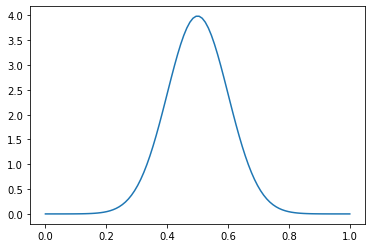

In [4]:
plt.plot(x, norm_prior);

In [5]:
def joint(n, y, theta):
    return (theta**y) *( (1-theta)**(n-y)) * (norm.pdf(theta, loc = 0.5, scale = 0.1))

def likelihood(n, y, theta):
    return (theta**y) *( (1-theta)**(n-y))

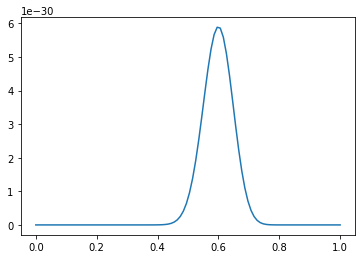

In [7]:
plt.plot(x, likelihood(100, 60, x));

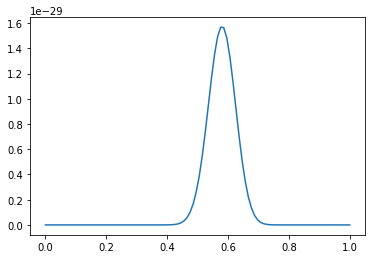

In [8]:
plt.plot(x, joint(100, 60, x));

In [17]:
# denominator
simps(joint(100, 60, x), dx=x[99]-x[0]) 

1.7313492223393783e-28

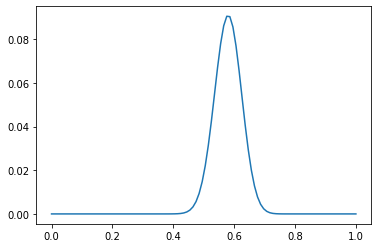

In [18]:
plt.plot(x, joint(100, 60, x) / simps(joint(100, 60, x), dx=x[99]-x[0]) );

In [16]:
simps(joint(100, 60, x) / simps(joint(100, 60, x), dx=x[99]-x[0]), dx =x[99]-x[0])

1.0

## MCMC

In [19]:
mu_current = 0.5

In [21]:
proposal_width = 1
mu_proposal = norm(mu_current, proposal_width).rvs()

mu_proposal

-0.8068485605008731

In [37]:
data = np.concatenate((np.repeat(1, 40), np.repeat(0, 60)))

In [38]:
likelihood_current = norm(mu_current, 1).pdf(data).prod()
print(likelihood_current)
likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
print(likelihood_proposal)

4.595423685200117e-46
1.787872634875121e-77


In [ ]:
mu_prior_mu=0.5 
mu_prior_sd=0.1

In [ ]:
# Compute prior probability of current and proposed mu        
prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)